In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import nltk
import spacy

In [4]:
from nltk.corpus import gutenberg

In [5]:
from textblob import TextBlob as TB

In [3]:
nlp = spacy.load('en')

In [6]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [8]:
emma = gutenberg.raw('austen-emma.txt')

In [9]:
parsed_emma = nlp(emma)

In [11]:
import re
sample_size = 100
my_sample = random.sample(list(parsed_emma.sents), sample_size)

In [12]:
sample = []
for sent in parsed_emma.sents:
    #sent = sent.replace('--', ' ')
    sent = re.sub("\s+", " ", sent.text)
    sample.append(sent)

In [27]:
persons_per_sentence = []
sentiments = []
for sent in sample:
    person_ents = []
    parsed_sentence = nlp(sent)
    tb_sentence = TB(sent)
    sentiment = tb_sentence.sentiment.polarity
    for ent in parsed_sentence.ents:
        if ent.label_ == 'PERSON' and ent.text not in person_ents:
            person_ents.append(ent.text)
    if len(person_ents) > 1: 
        persons_per_sentence.append(person_ents)
        sentiments.append(sentiment)

In [28]:
import itertools

relationships_counts = {}
sentiments_vals = {}

for (person_set, sentiment) in zip(persons_per_sentence, sentiments):
    for combo in itertools.combinations(person_set, 2):
        combo = tuple(sorted(combo))
        if combo not in relationships_counts:
            relationships_counts[combo] = 1
            sentiments_vals[combo] = [sentiment]
        else:
            relationships_counts[combo] +=1
            sentiments_vals[combo].append(sentiment)

In [32]:
import numpy as np

In [34]:
avg_sentiment = {k: np.mean(v) for k, v in sentiments_vals.items()}

In [35]:
rels = sorted(relationships_counts.items(), key=lambda kv: -kv[1])

In [44]:
import networkx as nx

G = nx.Graph()
edge_labels = []

rels_to_plot = 20
for rel in rels[:rels_to_plot]:
    #G.add_edge(rel[0][0], rel[0][1], weight=rel[1])
    #edge_labels.append(rel[1])
    G.add_edge(rel[0][0], rel[0][1], weight=avg_sentiment[rel[0]])
    edge_labels.append("{:.2f}".format(avg_sentiment[rel[0]]))
    print(rel[0], "{:.2f}".format(avg_sentiment[rel[0]]))

('Emma', 'Weston') 0.11
('Emma', 'Harriet') 0.19
('Emma', 'Knightley') 0.10
('Elton', 'Emma') 0.11
('Elton', 'Harriet') 0.15
('Emma', 'Woodhouse') 0.10
('Elton', 'Weston') 0.11
('Elton', 'Knightley') 0.20
('Weston', 'Woodhouse') 0.04
('Knightley', 'Woodhouse') 0.27
('Knightley', 'Weston') 0.21
('Emma', 'Frank Churchill') 0.16
('Elton', 'Jane') 0.08
('Bates', 'Emma') 0.07
('Harriet', 'Knightley') 0.11
('Emma', 'Jane') 0.20
('Emma', 'Isabella') 0.21
('Frank Churchill', 'Knightley') 0.33
('Frank Churchill', 'Weston') 0.25
('Emma', 'Jane Fairfax') 0.18


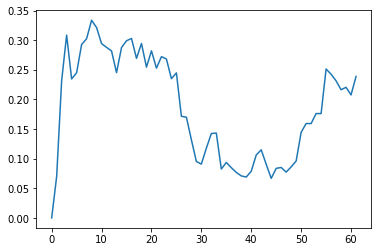

In [53]:
plt.plot(pd.Series(sentiments_vals[('Emma', 'Harriet')]).ewm(10).mean())

In [49]:
str_labels = {k: "{:.2f}".format(v) for k,v in labels.items()}

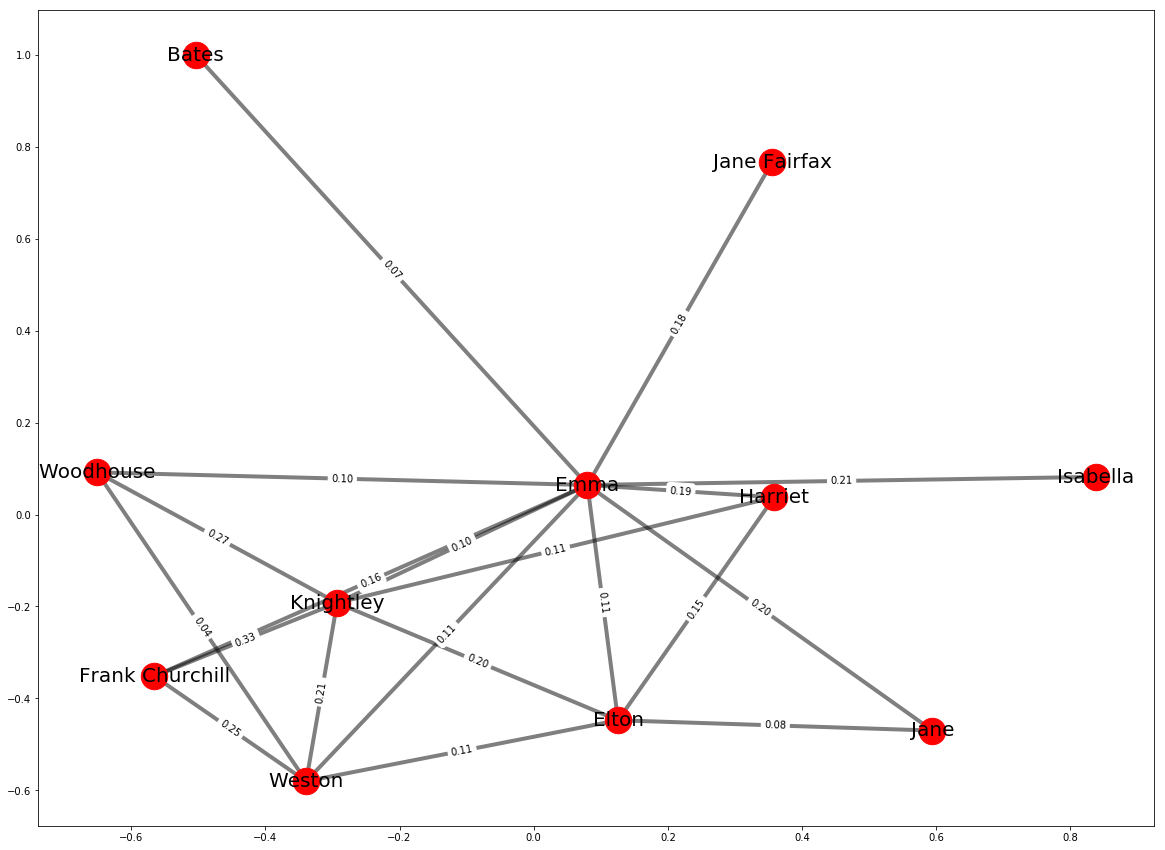

In [50]:
pos = nx.spring_layout(G)

plt.figure(figsize=(20, 15))

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=4, alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif');

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=str_labels)
plt.show()